# Indian Financial Market Liquidity Forecasting Engine
Liquidity Forecast: REGRESSION & Risk Regime: CLASSIFICATION

#### 1. INTRODUCTION

The Indian Financial Market Liquidity Forecasting Engine is a machine learning–driven predictive system designed to analyze and forecast liquidity conditions across major Indian money markets using historical RBI financial data.
This system provides both numerical liquidity forecasts and market risk regime classification, enabling proactive treasury and policy decision-making

## 1. Importing essential python libraries 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## 2. Dataset Loading

In [51]:
df=pd.read_csv("Average Daily Turnover in Select Financial Markets.csv")

## 3. Data Cleaning & Preprocessing

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Week Ended                       913 non-null    object 
 1   Call Money                       913 non-null    float64
 2   Notice Money                     913 non-null    float64
 3   Term Money                       913 non-null    float64
 4   Triparty Repo                    913 non-null    float64
 5   Market Repo                      913 non-null    float64
 6   Repo in Corporate Bond           626 non-null    float64
 7   Forex (US $ million)             911 non-null    float64
 8   Govt. of India Dated Securities  913 non-null    float64
 9   State Govt. Securities           913 non-null    float64
 10  91-Day Treasury Bills            913 non-null    float64
 11  182-Day Treasury Bills           912 non-null    float64
 12  364-Day Treasury Bills

In [53]:
df.isnull().sum()

Week Ended                           1
Call Money                           1
Notice Money                         1
Term Money                           1
Triparty Repo                        1
Market Repo                          1
Repo in Corporate Bond             288
Forex (US $ million)                 3
Govt. of India Dated Securities      1
State Govt. Securities               1
91-Day Treasury Bills                1
182-Day Treasury Bills               2
364-Day Treasury Bills               1
Cash Management Bills              659
Total Govt. Securities               4
Total RBI Securities               184
dtype: int64

In [54]:
df['Cash Management Bills'].value_counts()

Cash Management Bills
0.00       83
2.00        2
3850.48     1
3227.60     1
1602.86     1
           ..
7.67        1
1049.74     1
395.00      1
911.41      1
1484.06     1
Name: count, Length: 172, dtype: int64

In [55]:
df.fillna('0',inplace=True)

In [56]:
df.isnull().sum()

Week Ended                         0
Call Money                         0
Notice Money                       0
Term Money                         0
Triparty Repo                      0
Market Repo                        0
Repo in Corporate Bond             0
Forex (US $ million)               0
Govt. of India Dated Securities    0
State Govt. Securities             0
91-Day Treasury Bills              0
182-Day Treasury Bills             0
364-Day Treasury Bills             0
Cash Management Bills              0
Total Govt. Securities             0
Total RBI Securities               0
dtype: int64

In [57]:
df.head()

,Week Ended,Call Money,Notice Money,Term Money,Triparty Repo,Market Repo,Repo in Corporate Bond,Forex (US $ million),Govt. of India Dated Securities,State Govt. Securities,91-Day Treasury Bills,182-Day Treasury Bills,364-Day Treasury Bills,Cash Management Bills,Total Govt. Securities,Total RBI Securities
0,26-09-2025,31297.7,656.08,1038.17,738792.37,681777.09,15960.0,140364.0,131047.32,7932.43,4180.38,1618.9,3422.76,0.0,148201.78,1618.58
1,19-09-2025,34205.0,7384.0,1259.0,857666.28,811438.02,14021.0,125999.0,103508.14,9797.3,4842.33,2686.06,5020.33,0.0,125854.16,383.65
2,12-09-2025,31808.0,425.6,2350.0,681101.24,623329.5,11061.0,128636.0,181149.84,5944.42,8549.29,2859.25,2673.54,0.0,201176.33,1139.36
3,05-09-2025,20066.0,6430.0,966.67,559054.28,510321.18,7895.0,103733.0,86539.31,5486.23,6080.4,2410.91,756.41,0.0,101273.26,365.6
4,29-08-2025,27549.32,9327.93,1359.5,880735.55,776483.6,12740.5,143071.0,113169.35,6970.82,4380.82,4324.24,2150.2,0.0,130995.42,1196.43


In [58]:
df.columns

Index(['Week Ended', 'Call Money', 'Notice Money', 'Term Money',
       'Triparty Repo', 'Market Repo', 'Repo in Corporate Bond',
       'Forex (US $ million)', 'Govt. of India Dated Securities',
       'State Govt. Securities', '91-Day Treasury Bills',
       '182-Day Treasury Bills', '364-Day Treasury Bills',
       'Cash Management Bills', 'Total Govt. Securities',
       'Total RBI Securities'],
      dtype='object')

In [59]:
df = df[df['Week Ended'] != "0"]

In [60]:
df["Week Ended"] = pd.to_datetime(df["Week Ended"])

In [61]:
df['Year'] = df['Week Ended'].dt.year

In [62]:
object_cols = df.select_dtypes(include='object').columns

print("Object columns:", object_cols)

for col in object_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)   # remove thousand separators
        .str.replace('–', '', regex=False)   # remove long dash
        .str.replace('-', '', regex=False)   # remove dash
        .str.replace(' ', '', regex=False)   # remove spaces
    )

    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(0, inplace=True)

Object columns: Index(['Call Money', 'Notice Money', 'Term Money', 'Triparty Repo',
       'Market Repo', 'Repo in Corporate Bond', 'Forex (US $ million)',
       'Govt. of India Dated Securities', 'State Govt. Securities',
       '91-Day Treasury Bills', '182-Day Treasury Bills',
       '364-Day Treasury Bills', 'Cash Management Bills',
       'Total Govt. Securities', 'Total RBI Securities'],
      dtype='object')


In [63]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 0 to 912
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Week Ended                       913 non-null    datetime64[ns]
 1   Call Money                       913 non-null    float64       
 2   Notice Money                     913 non-null    float64       
 3   Term Money                       913 non-null    float64       
 4   Triparty Repo                    913 non-null    float64       
 5   Market Repo                      913 non-null    float64       
 6   Repo in Corporate Bond           913 non-null    float64       
 7   Forex (US $ million)             913 non-null    float64       
 8   Govt. of India Dated Securities  913 non-null    float64       
 9   State Govt. Securities           913 non-null    float64       
 10  91-Day Treasury Bills            913 non-null    float64       
 11

## 4.Feature Engineering

In [64]:
df = df.sort_values("Week Ended")

df["t-1 period(lag value)"] = df["Call Money"].shift(1)
df["Moving Average (7-Period Window)"]  = df["Call Money"].rolling(7).mean()
df["Volatility"]  = df["Call Money"].rolling(7).std()

df.dropna(inplace=True)

In [65]:
df.head()

,Week Ended,Call Money,Notice Money,Term Money,Triparty Repo,Market Repo,Repo in Corporate Bond,Forex (US $ million),Govt. of India Dated Securities,State Govt. Securities,91-Day Treasury Bills,182-Day Treasury Bills,364-Day Treasury Bills,Cash Management Bills,Total Govt. Securities,Total RBI Securities,Year,t-1 period(lag value),Moving Average (7-Period Window),Volatility
906,2008-05-16,22792.07,4320.71,289.00,76666.90,64415.90,0.0,34310.00,14032.41,42.21,482.04,89.37,175.22,0.0,14821.25,0.0,2008,16462.72,17957.180000,4111.050278
905,2008-05-23,12732.79,3994.34,1096.00,65444.90,56359.55,0.0,29473.25,9646.91,25.08,848.13,178.15,259.00,0.0,10957.27,0.0,2008,22792.07,17594.182857,4482.848788
904,2008-05-30,22237.43,4934.38,467.17,77787.22,56769.60,0.0,34183.80,9923.92,102.27,182.92,31.78,56.00,0.0,10296.88,0.0,2008,12732.79,19008.902857,4091.859681
903,2008-06-06,19080.93,3465.49,252.83,81908.73,48529.48,0.0,31941.20,6553.15,73.74,536.29,55.60,512.34,0.0,7731.11,0.0,2008,22237.43,19557.254286,3745.536017
902,2008-06-13,18296.60,3985.27,397.33,83160.77,51283.82,0.0,29755.60,11331.48,61.52,325.94,81.91,88.60,0.0,11889.45,0.0,2008,19080.93,19091.220000,3656.884568


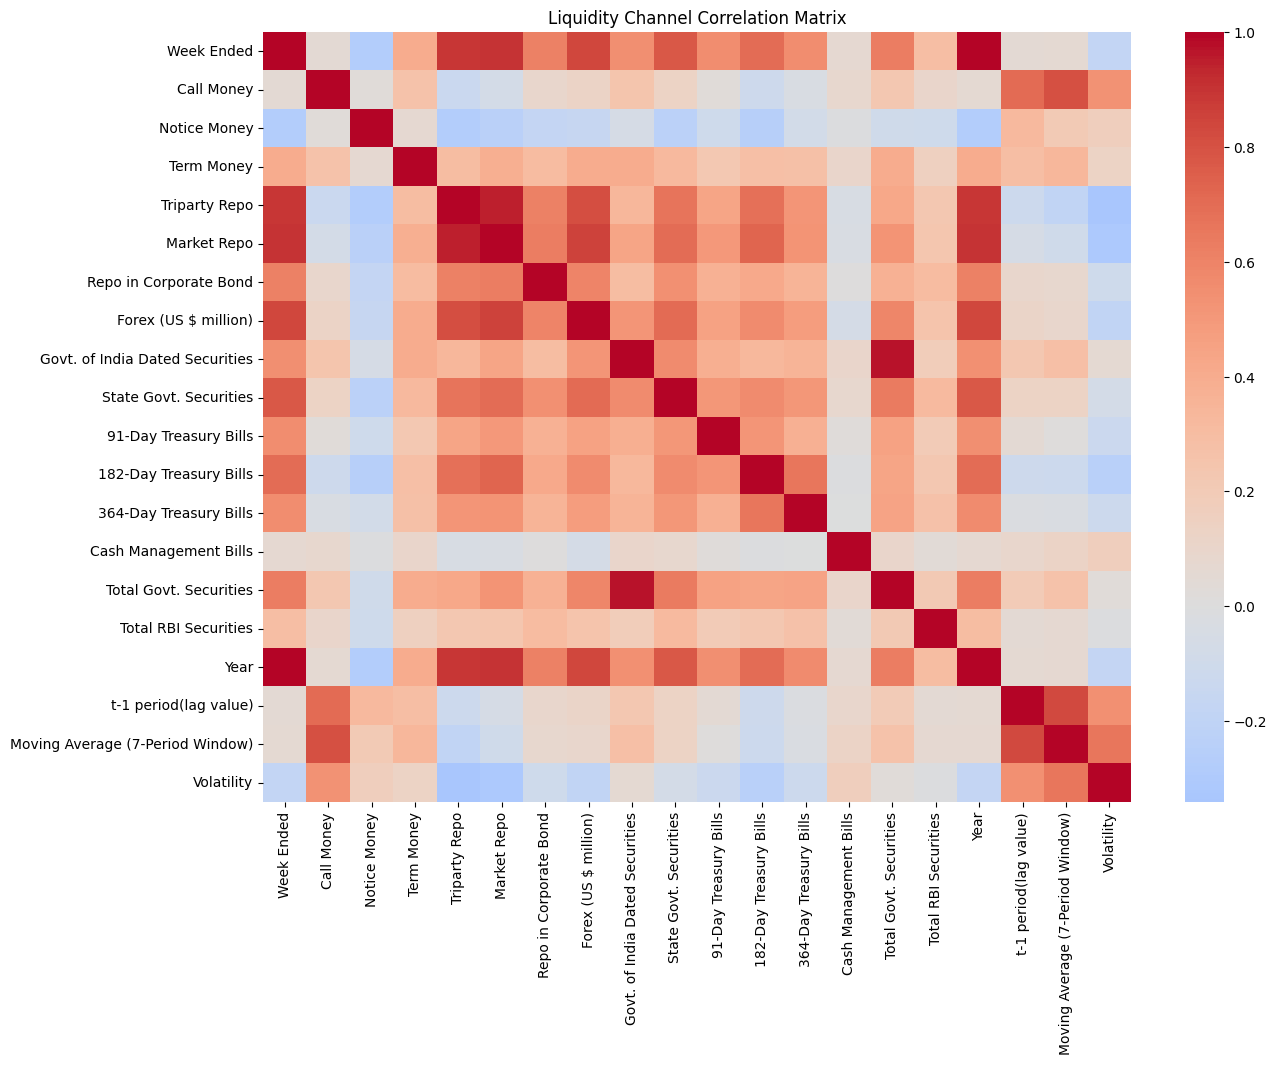

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Liquidity Channel Correlation Matrix")
plt.show()

In [67]:
df.drop(["Forex (US $ million)","Week Ended","Year","Total Govt. Securities","Total RBI Securities","Cash Management Bills"], axis=1, inplace=True)

In [68]:
df.head()

,Call Money,Notice Money,Term Money,Triparty Repo,Market Repo,Repo in Corporate Bond,Govt. of India Dated Securities,State Govt. Securities,91-Day Treasury Bills,182-Day Treasury Bills,364-Day Treasury Bills,t-1 period(lag value),Moving Average (7-Period Window),Volatility
906,22792.07,4320.71,289.00,76666.90,64415.90,0.0,14032.41,42.21,482.04,89.37,175.22,16462.72,17957.180000,4111.050278
905,12732.79,3994.34,1096.00,65444.90,56359.55,0.0,9646.91,25.08,848.13,178.15,259.00,22792.07,17594.182857,4482.848788
904,22237.43,4934.38,467.17,77787.22,56769.60,0.0,9923.92,102.27,182.92,31.78,56.00,12732.79,19008.902857,4091.859681
903,19080.93,3465.49,252.83,81908.73,48529.48,0.0,6553.15,73.74,536.29,55.60,512.34,22237.43,19557.254286,3745.536017
902,18296.60,3985.27,397.33,83160.77,51283.82,0.0,11331.48,61.52,325.94,81.91,88.60,19080.93,19091.220000,3656.884568


# REGRESSION MODELS (Forecast Liquidity)

#### Feature Selection & Dataset Splitting

In [69]:
xr = df.drop("Call Money",axis=1)
yr = df["Call Money"]

from sklearn.model_selection import train_test_split
xrtrain, xrtest, yrtrain, yrtest = train_test_split(xr, yr, test_size=0.2, shuffle=False)

#### Model Training, Model Evaluation & Model Training

### 1. LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr = LinearRegression()
lr.fit(xrtrain,yrtrain)

pred = lr.predict(xrtest)

print("Linear Regression")
print("MAE:",mean_absolute_error(yrtest,pred))
print("RMSE:",np.sqrt(mean_squared_error(yrtest,pred)))
print("R2:",r2_score(yrtest,pred))

Linear Regression
MAE: 2352.8071604970132
RMSE: 2922.1101509726245
R2: 0.5894103865765947


### 2. Ridge

In [71]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=4)
ridge.fit(xrtrain,yrtrain)
pred = ridge.predict(xrtest)

print("Ridge")
print("MAE:",mean_absolute_error(yrtest,pred))
print("RMSE:",np.sqrt(mean_squared_error(yrtest,pred)))
print("R2:",r2_score(yrtest,pred))

Ridge
MAE: 2352.8071592823235
RMSE: 2922.110149980891
R2: 0.5894103868552942


### 3. Lasso

In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=6)
lasso.fit(xrtrain,yrtrain)
pred = lasso.predict(xrtest)

print("Lasso")
print("MAE:",mean_absolute_error(yrtest,pred))
print("RMSE:",np.sqrt(mean_squared_error(yrtest,pred)))
print("R2:",r2_score(yrtest,pred))

Lasso
MAE: 2352.796026193379
RMSE: 2922.0988422524497
R2: 0.5894135645772999


### 4. DecisionTreeRegressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=6)
dt.fit(xrtrain,yrtrain)
pred = dt.predict(xrtest)

print("Decision Tree")
print("MAE:",mean_absolute_error(yrtest,pred))
print("RMSE:",np.sqrt(mean_squared_error(yrtest,pred)))
print("R2:",r2_score(yrtest,pred))

Decision Tree
MAE: 2657.510831903615
RMSE: 3515.0093751681075
R2: 0.40588876056973366


### GradientBoostingRegressor

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_depth=5)
gb.fit(xrtrain,yrtrain)
pred = gb.predict(xrtest)

print("Gradient Boosting")
print("MAE:",mean_absolute_error(yrtest,pred))
print("RMSE:",np.sqrt(mean_squared_error(yrtest,pred)))
print("R2:",r2_score(yrtest,pred))

Gradient Boosting
MAE: 2475.9771005688476
RMSE: 3262.215777233621
R2: 0.4882708453587038


### RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300,max_depth=10,random_state=42)
rf.fit(xrtrain,yrtrain)
pred = rf.predict(xrtest)

print("Random Forest")
print("MAE:",mean_absolute_error(yrtest,pred))
print("RMSE:",np.sqrt(mean_squared_error(yrtest,pred)))
print("R2:",r2_score(yrtest,pred))

Random Forest
MAE: 2292.5098786418284
RMSE: 3035.948364366726
R2: 0.5567961191120077


### XGBRegressor

In [76]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=82,learning_rate=0.03,max_depth=5,subsample=0.5,colsample_bytree=0.758)
xgb.fit(xrtrain,yrtrain)
pred = xgb.predict(xrtest)

print("XGBoost")
print("MAE:",mean_absolute_error(yrtest,pred))
print("RMSE:",np.sqrt(mean_squared_error(yrtest,pred)))
print("R2:",r2_score(yrtest,pred))

XGBoost
MAE: 1910.72755859375
RMSE: 2453.445440836467
R2: 0.7105539665317447


In [77]:
best_regression_model = xgb

# CLASSIFICATION MODELS (Risk Regimes)

#### Feature Selection & Dataset Splitting

In [132]:
df["Risk_Class"] = pd.qcut(df["Call Money"],3,labels=[1,0,2])

In [133]:
df["lag_risk"] = df["Risk_Class"].shift(1)
df["trend_risk"] = df["Risk_Class"].rolling(4).mean()
df.dropna(inplace=True)

#### Liquidity Level (Call Money) Assigned Risk | 🟢 Low Risk → 1 | 🟡 Medium Risk → 0 | 🔴 High Risk → 2 

In [134]:
xc = df.drop(["Call Money","Risk_Class"],axis=1)
yc = df["Risk_Class"]

from sklearn.model_selection import train_test_split
xctrain, xctest, yctrain, yctest = train_test_split(xc, yc, test_size=0.2, shuffle=False)

#### Model Training, Model Evaluation & Model Training

### 1. Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

log = LogisticRegression(max_iter=2000)
log.fit(xctrain,yctrain)

pred = log.predict(xctest)
print("Logistic Regression")
print(classification_report(yctest,pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.51      0.30      0.38        71
           1       0.41      0.85      0.55        65
           2       1.00      0.11      0.20        44

    accuracy                           0.45       180
   macro avg       0.64      0.42      0.38       180
weighted avg       0.59      0.45      0.40       180



### 2. K-Nearest Neighbors

In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xctrain,yctrain)

pred = knn.predict(xctest)
print("KNN")
print(classification_report(yctest,pred))

KNN
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.36      1.00      0.53        65
           2       0.00      0.00      0.00        44

    accuracy                           0.36       180
   macro avg       0.12      0.33      0.18       180
weighted avg       0.13      0.36      0.19       180



### 3. Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(xctrain,yctrain)

pred = nb.predict(xctest)
print("Naive Bayes")
print(classification_report(yctest,pred))

Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.37      1.00      0.53        65
           2       0.00      0.00      0.00        44

    accuracy                           0.36       180
   macro avg       0.12      0.33      0.18       180
weighted avg       0.13      0.36      0.19       180



### 4. Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(xctrain,yctrain)

pred = dt.predict(xctest)
print("Decision Tree")
print(classification_report(yctest,pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        71
           1       0.63      0.52      0.57        65
           2       0.75      0.86      0.80        44

    accuracy                           0.66       180
   macro avg       0.67      0.68      0.67       180
weighted avg       0.66      0.66      0.66       180



### 5. Support Vector Machine(SVC)

In [139]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf",C=10,gamma="scale")
svm.fit(xctrain,yctrain)

pred = svm.predict(xctest)
print("SVM")
print(classification_report(yctest,pred))

SVM
              precision    recall  f1-score   support

           0       0.67      0.03      0.05        71
           1       0.34      0.89      0.50        65
           2       0.25      0.05      0.08        44

    accuracy                           0.34       180
   macro avg       0.42      0.32      0.21       180
weighted avg       0.45      0.34      0.22       180



### 6. Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300,max_depth=10,random_state=42)
rfc.fit(xctrain,yctrain)

pred = rfc.predict(xctest)
print("Random Forest")
print(classification_report(yctest,pred))

Random Forest
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        71
           1       0.73      0.71      0.72        65
           2       0.91      0.89      0.90        44

    accuracy                           0.77       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.77      0.77      0.77       180



### 7. Gradient Boosting

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=5, subsample=0.7)
gbc.fit(xctrain,yctrain)

pred = gbc.predict(xctest)
print("Gradient Boosting")
print(classification_report(yctest,pred))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        71
           1       0.72      0.58      0.64        65
           2       0.88      0.86      0.87        44

    accuracy                           0.73       180
   macro avg       0.76      0.75      0.75       180
weighted avg       0.74      0.73      0.73       180



In [153]:
best_classifier = rfc

## REGRESSION MANUAL TESTING (Liquidity Forecast)

### Test Case 1 – Normal Market Condition

In [154]:
test_1 = xrtest.iloc[0].values.reshape(1,-1)
pred_1 = best_regression_model.predict(test_1)
print("Predicted Liquidity:", pred_1)

Predicted Liquidity: [17277.312]


### Test Case 2 – Sudden Liquidity Spike

In [155]:
test_2 = test_1.copy()
test_2[0][0] = test_2[0][0] * 1.5
print("Spike Prediction:", best_regression_model.predict(test_2))

Spike Prediction: [16806.965]


### Test Case 3 – Liquidity Crash Simulation

In [156]:
test_3 = test_1.copy()
test_3[0][0] = test_3[0][0] * 0.4
print("Crash Prediction:", best_regression_model.predict(test_3))

Crash Prediction: [17607.635]


### Test Case 4 – High Volatility Pattern

In [157]:
test_4 = test_1.copy()
test_4 = test_4 * 1.2
print("Volatile Prediction:", best_regression_model.predict(test_4))

Volatile Prediction: [21787.576]


### Test Case 5 – Near-Zero Liquidity

In [158]:
test_5 = test_1.copy()
test_5 = test_5 * 0.05
print("Near Zero Prediction:", best_regression_model.predict(test_5))

Near Zero Prediction: [17791.027]


## CLASSIFICATION MANUAL TESTING (Risk Regime)

### Liquidity Level (Call Money) Assigned Risk | 🟢 Low Risk → 1 | 🟡 Medium Risk → 0 | 🔴 High Risk → 2 

In [159]:
def interpret_risk(prediction):

    if prediction == 1:
        return "🟢 LOW RISK: Market has high liquidity. Money flow is smooth and stable."

    elif prediction == 0:
        return "🟡 MEDIUM RISK: Market liquidity is normal. Regular monitoring required."

    elif prediction == 2:
        return "🔴 HIGH RISK: Liquidity crunch detected! Market is under financial stress."

    else:
        return "⚠️ Unknown Risk Level"

### Test Case 1 – Normal Market

In [160]:
sample_1 = xctest.iloc[0].values.reshape(1,-1)

prediction = best_classifier.predict(sample_1)[0]

print("Predicted Risk:", best_classifier.predict(sample_1))
print(interpret_risk(prediction))

Predicted Risk: [1]
🟢 LOW RISK: Market has high liquidity. Money flow is smooth and stable.


### Test Case 2 – High Risk Surge

In [161]:
sample_2 = sample_1.copy()
sample_2 = sample_2 * 1.5
print("High Risk Prediction:", best_classifier.predict(sample_2))

prediction = best_classifier.predict(sample_2)[0]
print(interpret_risk(prediction))

High Risk Prediction: [0]
🟡 MEDIUM RISK: Market liquidity is normal. Regular monitoring required.


### Test Case 3 – Liquidity Drop

In [162]:
sample_3 = sample_1.copy()
sample_3 = sample_3 * 0.4
print("Low Risk Prediction:", best_classifier.predict(sample_3))

prediction = best_classifier.predict(sample_3)[0]
print(interpret_risk(prediction))

Low Risk Prediction: [1]
🟢 LOW RISK: Market has high liquidity. Money flow is smooth and stable.


### Test Case 4 – Extreme Volatility

In [163]:
sample_4 = sample_1.copy()
sample_4 = sample_4 * 2
print("Extreme Risk Prediction:", best_classifier.predict(sample_4))

prediction = best_classifier.predict(sample_4)[0]
print(interpret_risk(prediction))

Extreme Risk Prediction: [0]
🟡 MEDIUM RISK: Market liquidity is normal. Regular monitoring required.


### Test Case 5 – Near Zero Market

In [164]:
sample_5 = sample_1.copy()
sample_5 = sample_5 * 0.05
print("Near Zero Risk:", best_classifier.predict(sample_5))

prediction = best_classifier.predict(sample_5)[0]
print(interpret_risk(prediction))

Near Zero Risk: [0]
🟡 MEDIUM RISK: Market liquidity is normal. Regular monitoring required.
